<a href="https://colab.research.google.com/github/ziyasarican/PythonMachineLearning/blob/main/NLP/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

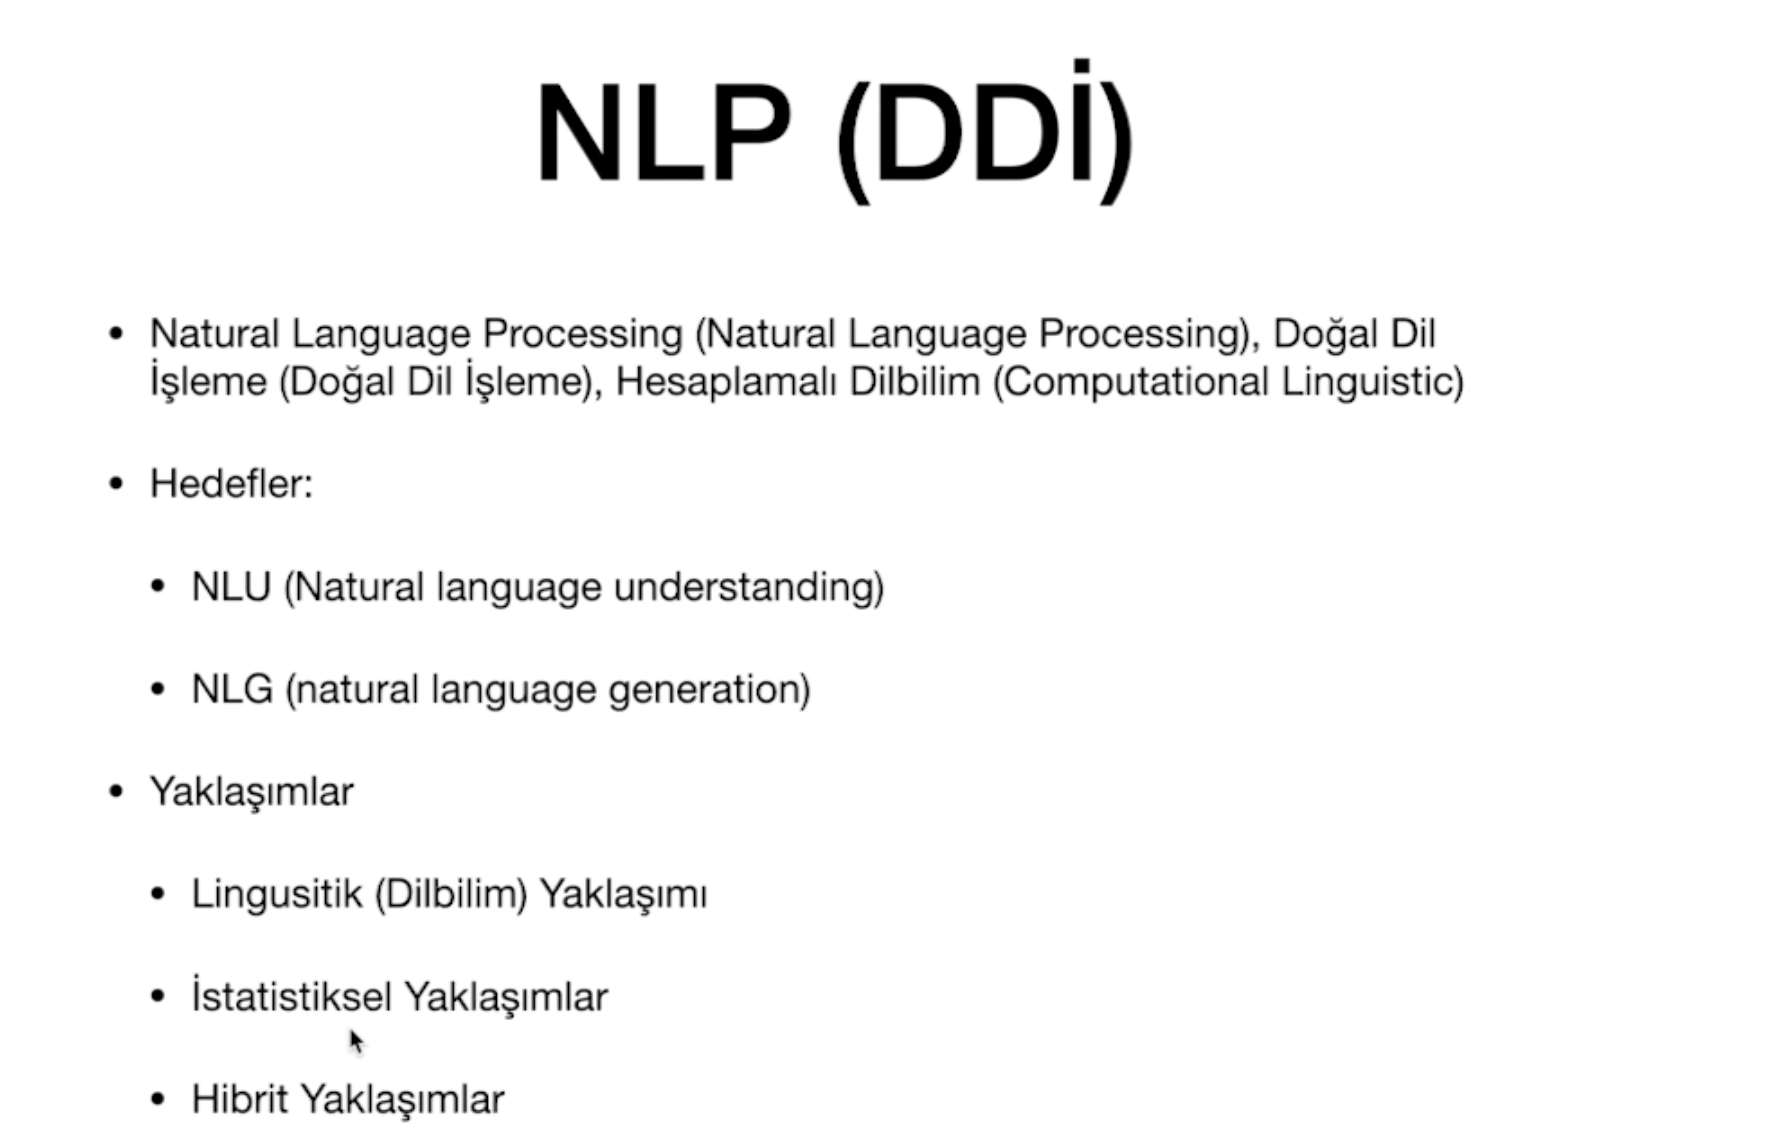

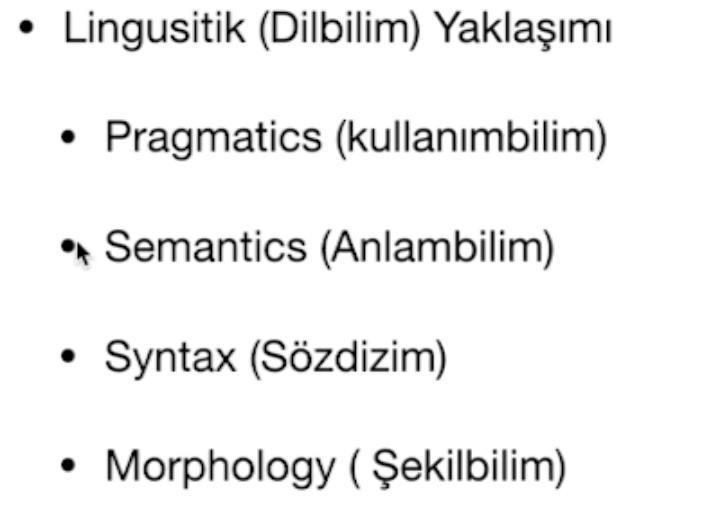

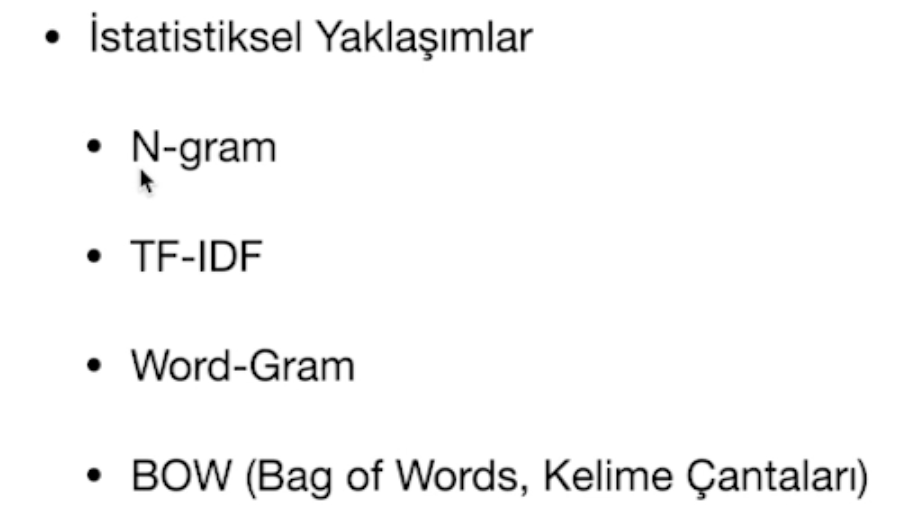

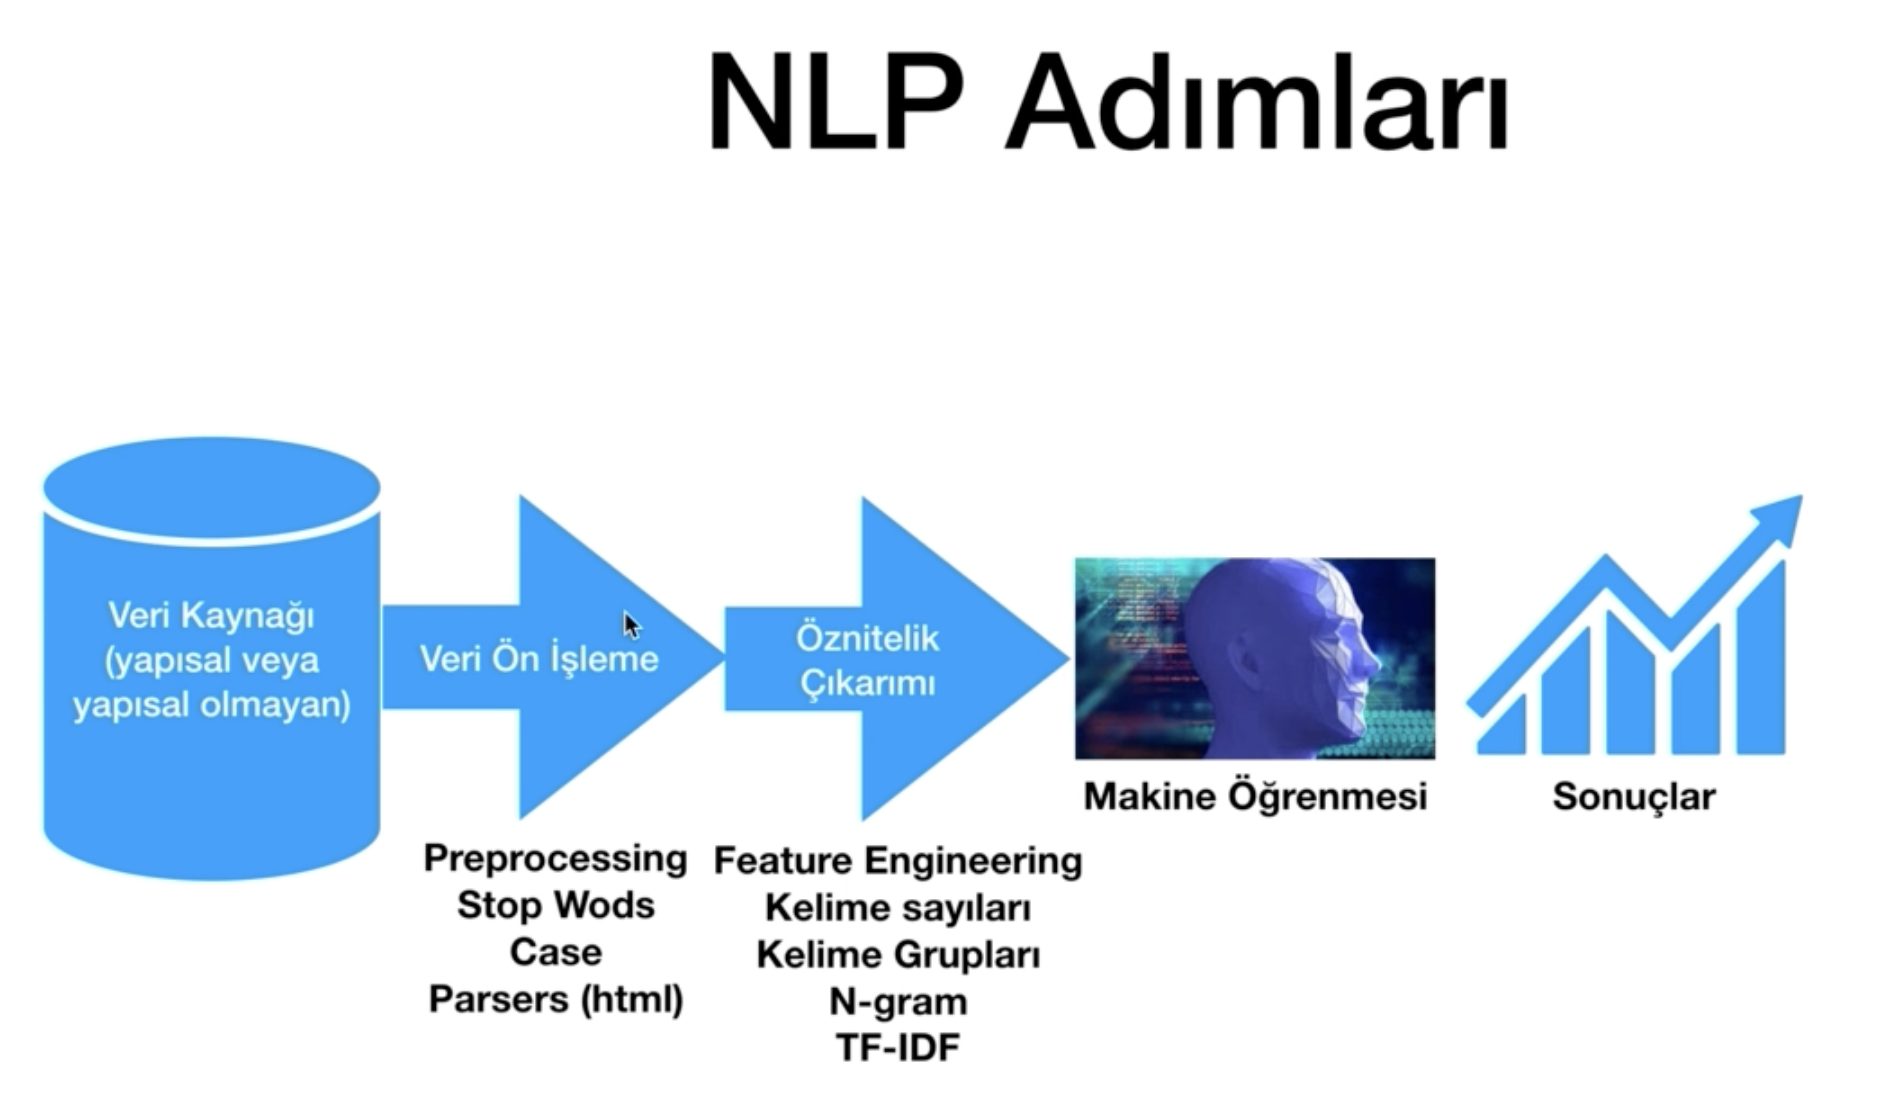

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("Restaurant_Reviews.tsv",delimiter = '\t')

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [28]:
# Noktalama işaretlerini kaldırma
yorum = re.sub("[^a-zA-Z]"," ",df["Review"][0])
yorum

'Wow    Loved this place '

In [29]:
# Büyük-küçük harf
yorum = yorum.lower()
yorum = yorum.split()
yorum

['wow', 'loved', 'this', 'place']

In [58]:
# Stop-words
import nltk
from nltk.stem.porter import PorterStemmer # köklerine inme
ps = PorterStemmer()
stopWords = nltk.download("stopwords")
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
yorum = [ps.stem(kelime) for kelime in yorum if not kelime in set(stopwords.words("english"))]
yorum

['wow', 'love', 'place']

In [31]:
yorum = " ".join(yorum)
yorum

'wow love place'

In [59]:
yorumList = []
for i in range(0,len(df)):
  yorum = re.sub("[^a-zA-Z]"," ",df["Review"][i])
  yorum = yorum.lower()
  yorum = yorum.split()
  yorum = [ps.stem(kelime) for kelime in yorum if not kelime in set(stopwords.words("english"))]
  yorum = " ".join(yorum)
  yorumList.append(yorum)

yorumList[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [78]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
x = cv.fit_transform(yorumList).toarray()
y = df.iloc[:,1].values

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predict = gnb.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


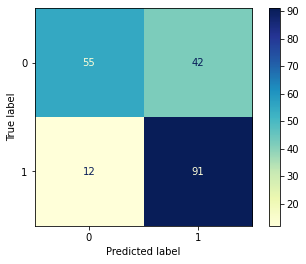

In [81]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(gnb, x_test, y_test, cmap = "YlGnBu")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


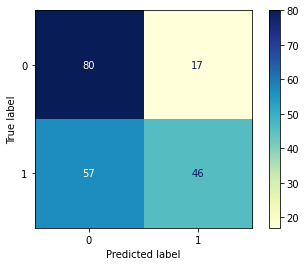

In [83]:
# KNN deneyelim
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors: bakılacak komşu sayısı. metric: mesafeyi hangi modelle ölçüleceği
KNN = KNeighborsClassifier(n_neighbors=5, metric="minkowski")
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
plot_confusion_matrix(KNN, x_test, y_test, cmap = "YlGnBu")